# Exercise 1 - MNIST CLASSIFIER

MNIST is a standard dataset used for classification task. This dataset consists of lots of images of handwritten digits. The task is to classify each image according to the number they represent 

## Importing Dependencies

In [6]:
#import dependancies
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

## Setting the hyperparameters
In the cell below, we shall set the different parameters of the model. These are user defined and you are encouraged to experiment with them

In [7]:
#config cell
num_classes = 10          #number of classes(0 to 9)  
input_shape = (28, 28, 1) #shape of an image
batch_size = 128          #How many images to train in one iteration
epochs = 15               #Number of times the model gets trained on the entire dataset 


## Data Loading, Visualization and Preprocessing

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


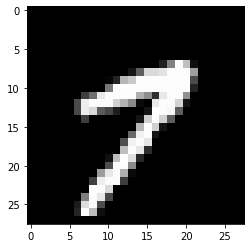

In [10]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#visualize the 79th image of the dataset. You can change this value to get an idea about different images
plt.imshow(x_train[79],cmap='gray')  

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## Model Architecture

In [3]:
#Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Training the model

In [4]:
#Compile the model with a loss function, optimizer and an evaluation metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Train the model, with 10% of the data being the validation set
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 14s 33ms/step - loss: 0.3718 - accuracy: 0.8858 - val_loss: 0.0826 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 14s 32ms/step - loss: 0.1166 - accuracy: 0.9637 - val_loss: 0.0592 - val_accuracy: 0.9835
Epoch 3/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0876 - accuracy: 0.9736 - val_loss: 0.0465 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0743 - accuracy: 0.9773 - val_loss: 0.0473 - val_accuracy: 0.9848
Epoch 5/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 6/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0585 - accuracy: 0.9817 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 7/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0549 - accuracy: 0.9821 - val_loss: 0.0390 - val_accuracy:

## Testing

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.024955153465270996
Test accuracy: 0.9908999800682068


Predicted Label:  5
Correct Label:  5


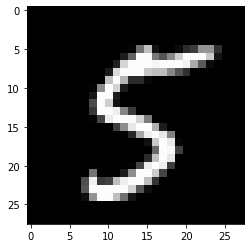

In [17]:
#view an image and the predicted label. Encouraged to experiment
test_img = x_test[129]
correct_label = y_test[129]
predicted_label = model.predict(np.expand_dims(test_img, 0))
plt.imshow(test_img[:,:,0],cmap='gray')
print("Predicted Label: ",np.argmax(predicted_label))
print("Correct Label: ",np.argmax(correct_label))